#Importar Data

In [0]:
import pandas as pd

In [2]:
df = pd.read_csv("Titanic_Limpio.csv")
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Edad,Tarifa,Lname,NamePrefix
0,0,3,1,1,0,2,4,0,73,11
1,1,1,0,1,0,0,0,3,136,12
2,1,3,0,0,0,2,7,0,251,8
3,1,1,0,1,0,2,7,3,198,12
4,0,3,1,0,0,2,7,1,11,11


#Árbol de Clasificación

In [0]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [0]:
# Entrenamos un arbol con poca profundidad, para visualizarlo comodamente:
from sklearn.tree import DecisionTreeClassifier
m = DecisionTreeClassifier(max_depth=3)
m = m.fit(x, y)

In [5]:
m.score(x,y)

0.8316498316498316

# ¿Cómo saber si el modelo esta haciendo un buen trabajo?

Vamos a separar la data en 2 conjuntos: uno para entrenar el modelo (**train set**) y otro para validar el modelo (**validation set**).

In [21]:
from sklearn.model_selection import train_test_split

# Usamos método "train_test_split" para usar el 20% de la data para validar el modelo.
# El parámetro "random state" nos sirve para poder replicar la misma separación.
#tes_size mayor, entonces la formacion de arbol es menor
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=11) # random_state=42 la data es fija para cada corrida, sin esto es aleatorio cambiante
print('Train shape: ',x_train.shape)
print('Validation shape: ',x_val.shape)

Train shape:  (712, 9)
Validation shape:  (179, 9)


In [22]:
x_train.head()

,Pclass,Sex,SibSp,Parch,Embarked,Edad,Tarifa,Lname,NamePrefix
333,3,1,2,0,2,5,2,625,11
662,1,1,0,0,2,0,2,121,11
382,3,1,0,0,2,7,0,602,11
331,1,1,0,0,2,0,2,468,11
149,2,1,0,0,2,0,1,83,14


### a. Entrenar un árbol de decisión con la data de entrenamiento.

In [0]:
m2 = DecisionTreeClassifier(max_depth=3)  #(max_depth=3,random_state=3)
m2 = m2.fit(x_train,y_train)

In [25]:
m2.tree_.max_depth

3

### b. Evaluar el resultado con la data de entrenamiento.

In [26]:
m2.score(x_train,y_train)

0.824438202247191

### c. Evaluar el resultado con la data de validación.

In [19]:
m2.score(x_val,y_val)

0.8547486033519553

In [27]:
m2.predict(x_val)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [28]:
y_val

431    1
821    1
629    0
626    0
665    0
      ..
638    0
771    0
521    0
711    0
484    1
Name: Survived, Length: 179, dtype: int64

###d. Encontrando el valor optimo para max_depth

In [0]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 15))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth,random_state=3)#random state sin
    clf.fit(x_train, y_train)    
    score = clf.score(x_val, y_val)
    
    accuracy.append(score)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

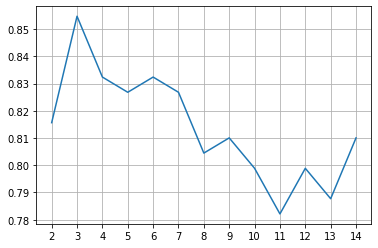

In [34]:
plt.plot(accuracy)
plt.xticks(list(range(len(max_depth_range))),max_depth_range)
plt.grid()
plt.show() # x profundiad, y scores

###e. Graficando nuestro arbol

In [0]:
from sklearn.tree import export_graphviz
import graphviz

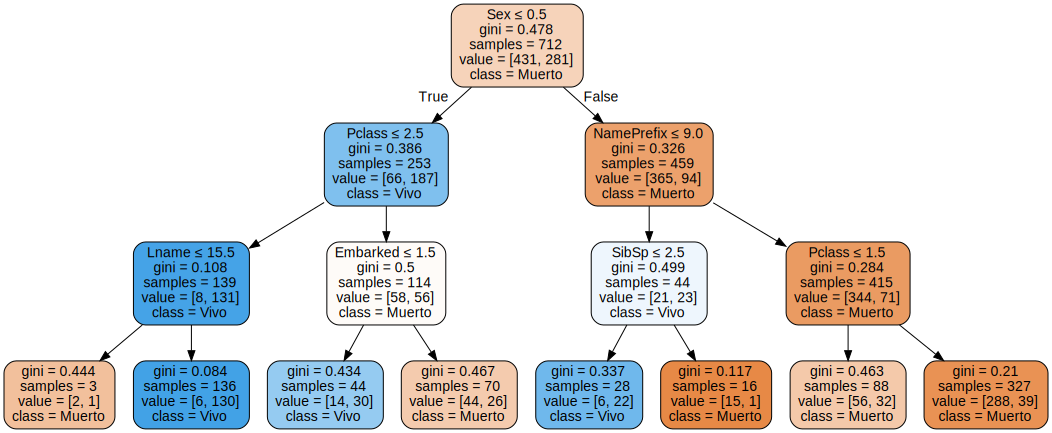

In [36]:
dot_data = export_graphviz(m2,feature_names= x.columns, class_names= ['Muerto','Vivo'],filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)
graph
#graph.render("arbol",format='png') 

#Árbol de Regresión

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
regresion = DecisionTreeRegressor(max_depth = 3)
regresion = regresion.fit (x_train, y_train)

In [41]:
regresion.score(x_val,y_val)

0.5175236428973454

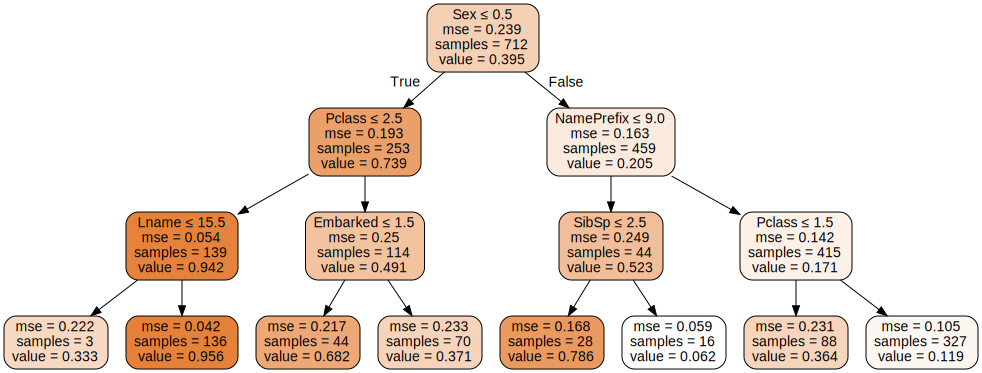

In [42]:
dot_data = export_graphviz(regresion,feature_names= x.columns, class_names= ['Muerto','Vivo'],filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)
graph

**REGRESION LINEAL CON ARBOL DE DESCICION** PETROL

In [0]:
import pandas as pd


In [44]:
df=pd.read_csv("petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [0]:
x = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

In [62]:
from sklearn.model_selection import train_test_split

# Usamos método "train_test_split" para usar el 20% de la data para validar el modelo.
# El parámetro "random state" nos sirve para poder replicar la misma separación.
#tes_size mayor, entonces la formacion de arbol es menor
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2) # random_state=11,  random_state=42 la data es fija para cada corrida, sin esto es aleatorio cambiante
print('Train shape: ',x_train.shape)
print('Validation shape: ',x_val.shape)

Train shape:  (38, 4)
Validation shape:  (10, 4)


In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
regresion = DecisionTreeRegressor() # max_depth = 3 eliminado
regresion = regresion.fit (x_train, y_train)

In [71]:
regresion.score(x_train,y_train)

1.0

In [72]:
regresion.score(x_val,y_val)

0.8364921953137051

DATA DE CLASIFICACION

In [74]:
regresion.predict(x_val)

array([574., 464., 457., 574., 510., 714., 498., 561., 566., 628.])

In [75]:
y_val

42    632
3     414
7     467
46    610
24    460
41    699
8     464
1     524
0     541
27    631
Name: Petrol_Consumption, dtype: int64